<a href="https://colab.research.google.com/github/Nikhil16np/Linear-regression/blob/main/Copy_of_Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
np.set_printoptions(precision=4, linewidth=100)

In [ ]:
mba_salary_df = pd.read_csv( 'MBA_Salary.csv' )
mba_salary_df.head( 10 )

,S. No.,Percentage in Grade 10,Salary
0,1,62.00,270000
1,2,76.33,200000
2,3,72.00,240000
3,4,60.00,250000
4,5,61.00,180000
5,6,55.00,300000
6,7,70.00,260000
7,8,68.00,235000
8,9,82.80,425000
9,10,59.00,240000


In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant( mba_salary_df['Percentage in Grade 10'] )
X.head(5)

,const,Percentage in Grade 10
0,1.0,62.00
1,1.0,76.33
2,1.0,72.00
3,1.0,60.00
4,1.0,61.00


In [ ]:
Y = mba_salary_df['Salary']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X, test_X, train_y, test_y = train_test_split( X ,Y, train_size = 0.8, random_state = 100 )

In [ ]:
mba_salary_lm = sm.OLS( train_y, train_X ).fit()

In [ ]:
print( mba_salary_lm.params )

const                     30587.285652
Percentage in Grade 10     3560.587383
dtype: float64


In [ ]:
mba_salary_lm.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Ordinary least squares
===================================================================================
Model:                    OLS                   Adj. R-squared:          0.190     
Dependent Variable:       Salary                AIC:                     1008.8680 
Date:                     2025-04-07 16:28      BIC:                     1012.2458 
No. Observations:         40                    Log-Likelihood:          -502.43   
Df Model:                 1                     F-statistic:             10.16     
Df Residuals:             38                    Prob (F-statistic):      0.00287   
R-squared:                0.211                 Scale:                   5.0121e+09
-----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t    P>|t|     [0.025       0.975]  
-----------------------------------------------------------------------------------
const                  30587.2857 71869.4497 0.4256 0.6728 -114904.8088 176079.3801
Percentage in Grade 10  3560.5874  1116.9258 3.1878 0.0029    1299.4892   5821.6855
-----------------------------------------------------------------------------------
Omnibus:                    2.048              Durbin-Watson:                 2.611
Prob(Omnibus):              0.359              Jarque-Bera (JB):              1.724
Skew:                       0.369              Prob(JB):                      0.422
Kurtosis:                   2.300              Condition No.:                 413  
===================================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly
specified.
"""

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

<Figure size 800x600 with 0 Axes>

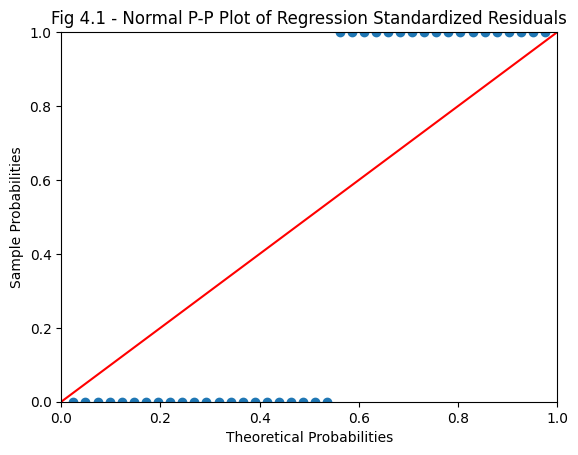

In [ ]:
mba_salary_resid = mba_salary_lm.resid
probplot = sm.ProbPlot( mba_salary_resid )
plt.figure( figsize = (8, 6) )
probplot.ppplot( line='45' )
plt.title( "Fig 4.1 - Normal P-P Plot of Regression Standardized Residuals" )
plt.show()

In [ ]:
def get_standardized_values( vals ):return (vals - vals.mean())/vals.std()

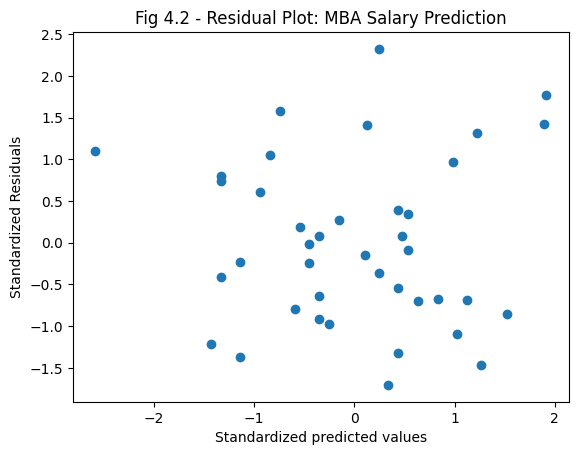

In [ ]:
plt.scatter( get_standardized_values( mba_salary_lm.fittedvalues ), get_standardized_values( mba_salary_resid ) )
plt.title( "Fig 4.2 - Residual Plot: MBA Salary Prediction" );
plt.xlabel( "Standardized predicted values")
plt.ylabel( "Standardized Residuals");

In [ ]:
from scipy.stats import zscore

In [ ]:
mba_salary_df['z_score_salary'] = zscore( mba_salary_df.Salary )

In [ ]:
mba_salary_df[ (mba_salary_df.z_score_salary > 3.0) | (mba_salary_df.z_score_salary < -3.0) ]

,S. No.,Percentage in Grade 10,Salary,z_score_salary


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['S. No.']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'S. No.'}, axis=1)
              .sort_values('S. No.', ascending=True))
  xs = counted['S. No.']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('S. No.', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('S. No.')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Percentage in Grade 10']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Percentage in Grade 10'}, axis=1)
              .sort_values('Percentage in Grade 10', ascending=True))
  xs = counted['Percentage in Grade 10']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('Percentage in Grade 10', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Percentage in Grade 10')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Salary']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Salary'}, axis=1)
              .sort_values('Salary', ascending=True))
  xs = counted['Salary']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('Salary', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Salary')
_ = plt.ylabel('count()')

In [ ]:
import numpy as np

In [ ]:
mba_influence = mba_salary_lm.get_influence()
(c, p) = mba_influence.cooks_distance

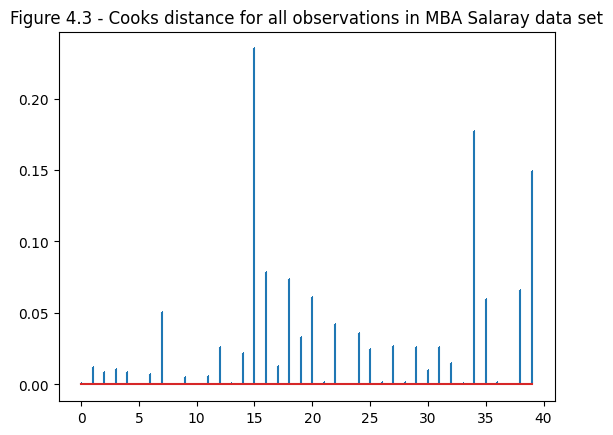

In [ ]:
plt.stem( np.arange( len( train_X) ), np.round( c, 3 ), markerfmt="," );
plt.title( "Figure 4.3 - Cooks distance for all observations in MBA Salaray data set" );

Text(0.5, 0, 'Row index')

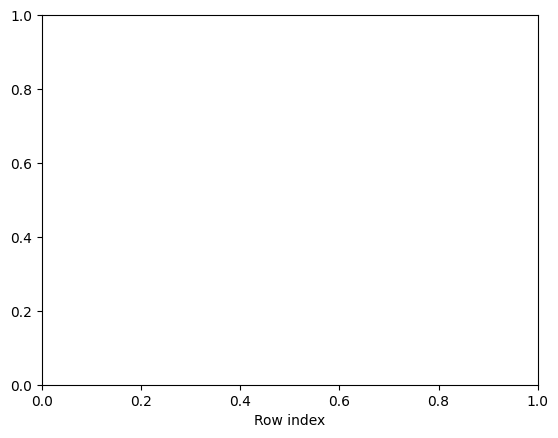

In [ ]:
plt.xlabel( "Row index")

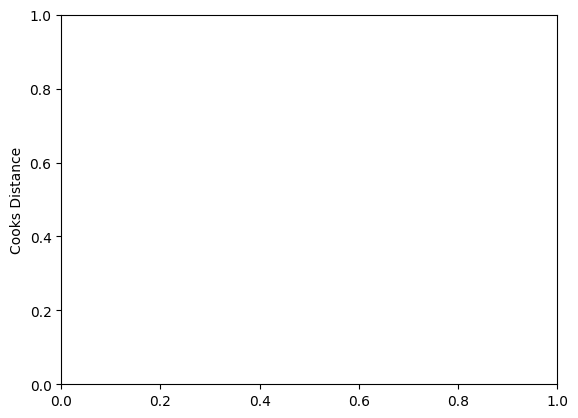

In [ ]:
plt.ylabel( "Cooks Distance");

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

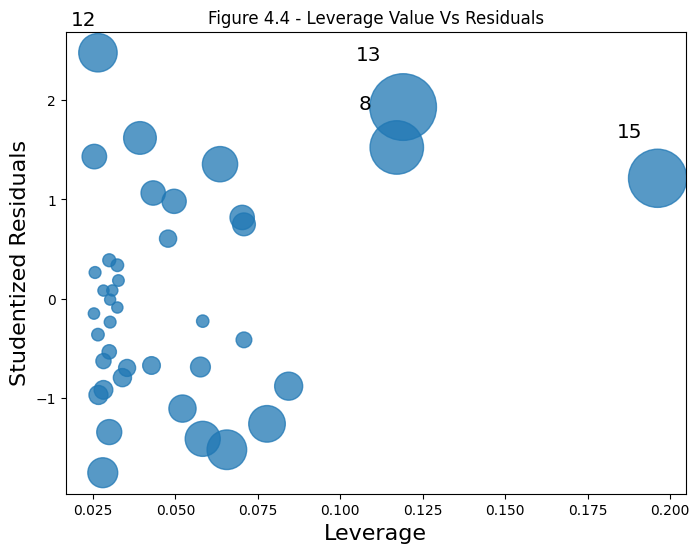

In [ ]:
fig, ax = plt.subplots( figsize=(8,6) )
influence_plot( mba_salary_lm, ax = ax )
plt.title( "Figure 4.4 - Leverage Value Vs Residuals")
plt.show();

In [ ]:
pred_y = mba_salary_lm.predict( test_X )

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
np.abs(r2_score(test_y, pred_y))
0.15664584974230378

0.15664584974230378

In [ ]:
import numpy

In [ ]:
np.sqrt(mean_squared_error(test_y, pred_y))
73458.04348346894

73458.04348346894

In [ ]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [ ]:
# Predict the y values
pred_y = mba_salary_lm.predict( test_X )

In [ ]:
# Predict the low and high interval values for y
_, pred_y_low, pred_y_high = wls_prediction_std( mba_salary_lm, test_X,alpha = 0.1)

In [ ]:
# Store all the values in a dataframe
pred_y_df = pd.DataFrame( { 'grade_10_perc': test_X['Percentage in Grade 10'], 'pred_y': pred_y, 'pred_y_left': pred_y_low, 'pred_y_right': pred_y_high } )

In [ ]:
pred_y_df[0:10]

,grade_10_perc,pred_y,pred_y_left,pred_y_right
6,70.0,279828.402452,158379.831862,401276.973042
36,68.0,272707.227686,151576.714839,393837.740534
37,52.0,215737.829560,92950.942211,338524.716909
28,58.0,237101.353858,115806.869437,358395.838278
43,74.5,295851.045675,173266.083158,418436.008191
49,60.8,247070.998530,126117.560802,368024.436257
5,55.0,226419.591709,104507.444206,348331.739212
33,78.0,308313.101515,184450.060303,432176.142727
20,63.0,254904.290772,134057.999077,375750.582466
42,74.4,295494.986937,172941.528507,418048.445366


from matplotlib import pyplot as plt
_df_4['grade_10_perc'].plot(kind='hist', bins=20, title='grade_10_perc')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['pred_y'].plot(kind='hist', bins=20, title='pred_y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['pred_y_left'].plot(kind='hist', bins=20, title='pred_y_left')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['pred_y_right'].plot(kind='hist', bins=20, title='pred_y_right')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='grade_10_perc', y='pred_y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='pred_y', y='pred_y_left', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='pred_y_left', y='pred_y_right', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['grade_10_perc'].plot(kind='line', figsize=(8, 4), title='grade_10_perc')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['pred_y'].plot(kind='line', figsize=(8, 4), title='pred_y')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['pred_y_left'].plot(kind='line', figsize=(8, 4), title='pred_y_left')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['pred_y_right'].plot(kind='line', figsize=(8, 4), title='pred_y_right')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
ipl_auction_df = pd.read_csv( 'Copy of IPL IMB381IPL2013.csv' )

In [ ]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sl.NO.         130 non-null    int64  
 1   PLAYER NAME    130 non-null    object 
 2   AGE            130 non-null    int64  
 3   COUNTRY        130 non-null    object 
 4   TEAM           130 non-null    object 
 5   PLAYING ROLE   130 non-null    object 
 6   T-RUNS         130 non-null    int64  
 7   T-WKTS         130 non-null    int64  
 8   ODI-RUNS-S     130 non-null    int64  
 9   ODI-SR-B       130 non-null    float64
 10  ODI-WKTS       130 non-null    int64  
 11  ODI-SR-BL      130 non-null    float64
 12  CAPTAINCY EXP  130 non-null    int64  
 13  RUNS-S         130 non-null    int64  
 14  HS             130 non-null    int64  
 15  AVE            130 non-null    float64
 16  SR-B           130 non-null    float64
 17  SIXERS         130 non-null    int64  
 18  RUNS-C    

In [ ]:
ipl_auction_df.iloc[0:5, 0:10]

,Sl.NO.,PLAYER NAME,AGE,COUNTRY,TEAM,PLAYING ROLE,T-RUNS,T-WKTS,ODI-RUNS-S,ODI-SR-B
0,1,"Abdulla, YA",2,SA,KXIP,Allrounder,0,0,0,0.00
1,2,Abdur Razzak,2,BAN,RCB,Bowler,214,18,657,71.41
2,3,"Agarkar, AB",2,IND,KKR,Bowler,571,58,1269,80.62
3,4,"Ashwin, R",1,IND,CSK,Bowler,284,31,241,84.56
4,5,"Badrinath, S",2,IND,CSK,Batsman,63,0,79,45.93


In [ ]:
ipl_auction_df.iloc[0:5, 13:]

,RUNS-S,HS,AVE,SR-B,SIXERS,RUNS-C,WKTS,AVE-BL,ECON,SR-BL,AUCTION YEAR,BASE PRICE,SOLD PRICE
0,0,0,0.00,0.00,0,307,15,20.47,8.90,13.93,2009,50000,50000
1,0,0,0.00,0.00,0,29,0,0.00,14.50,0.00,2008,50000,50000
2,167,39,18.56,121.01,5,1059,29,36.52,8.81,24.90,2008,200000,350000
3,58,11,5.80,76.32,0,1125,49,22.96,6.23,22.14,2011,100000,850000
4,1317,71,32.93,120.71,28,0,0,0.00,0.00,0.00,2011,100000,800000


from matplotlib import pyplot as plt
_df_15['RUNS-S'].plot(kind='hist', bins=20, title='RUNS-S')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['HS'].plot(kind='hist', bins=20, title='HS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['AVE'].plot(kind='hist', bins=20, title='AVE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['SR-B'].plot(kind='hist', bins=20, title='SR-B')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='RUNS-S', y='HS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='HS', y='AVE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='AVE', y='SR-B', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='SR-B', y='SIXERS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23['RUNS-S'].plot(kind='line', figsize=(8, 4), title='RUNS-S')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['HS'].plot(kind='line', figsize=(8, 4), title='HS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['AVE'].plot(kind='line', figsize=(8, 4), title='AVE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['SR-B'].plot(kind='line', figsize=(8, 4), title='SR-B')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
X_features = ipl_auction_df.columns

In [ ]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE', 'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL', 'ECON', 'SR-BL']

In [ ]:
ipl_auction_df['PLAYING ROLE'].unique()


array(['Allrounder', 'Bowler', 'Batsman', 'W. Keeper'], dtype=object)

In [ ]:
pd.get_dummies(ipl_auction_df['PLAYING ROLE'])[0:5]

,Allrounder,Batsman,Bowler,W. Keeper
0,True,False,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,True,False,False


from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('Allrounder').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('Batsman').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_29.groupby('Bowler').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Batsman'].value_counts()
    for x_label, grp in _df_30.groupby('Allrounder')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Allrounder')
_ = plt.ylabel('Batsman')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Bowler'].value_counts()
    for x_label, grp in _df_31.groupby('Batsman')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Batsman')
_ = plt.ylabel('Bowler')

In [ ]:
 import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

In [ ]:
wsb_df = pd.read_csv( 'wsb.csv' )
wsb_df.head(10)

,Month,Sale Quantity,Promotion Expenses,Competition Promotion
0,1,3002666,105,1
1,2,4401553,145,0
2,3,3205279,118,1
3,4,4245349,130,0
4,5,3001940,98,1
5,6,4377766,156,0
6,7,2798343,98,1
7,8,4303668,144,0
8,9,2958185,112,1
9,10,3623386,120,0


from matplotlib import pyplot as plt
_df_32['Month'].plot(kind='hist', bins=20, title='Month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_33['Sale Quantity'].plot(kind='hist', bins=20, title='Sale Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_34['Promotion Expenses'].plot(kind='hist', bins=20, title='Promotion Expenses')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_35['Competition Promotion'].plot(kind='hist', bins=20, title='Competition Promotion')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='Month', y='Sale Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='Sale Quantity', y='Promotion Expenses', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='Promotion Expenses', y='Competition Promotion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Month']
  ys = series['Sale Quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_39.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('Sale Quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Month']
  ys = series['Promotion Expenses']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('Promotion Expenses')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Month']
  ys = series['Competition Promotion']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('Competition Promotion')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Month'}, axis=1)
              .sort_values('Month', ascending=True))
  xs = counted['Month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_43['Month'].plot(kind='line', figsize=(8, 4), title='Month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_44['Sale Quantity'].plot(kind='line', figsize=(8, 4), title='Sale Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['Promotion Expenses'].plot(kind='line', figsize=(8, 4), title='Promotion Expenses')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['Competition Promotion'].plot(kind='line', figsize=(8, 4), title='Competition Promotion')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
 import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

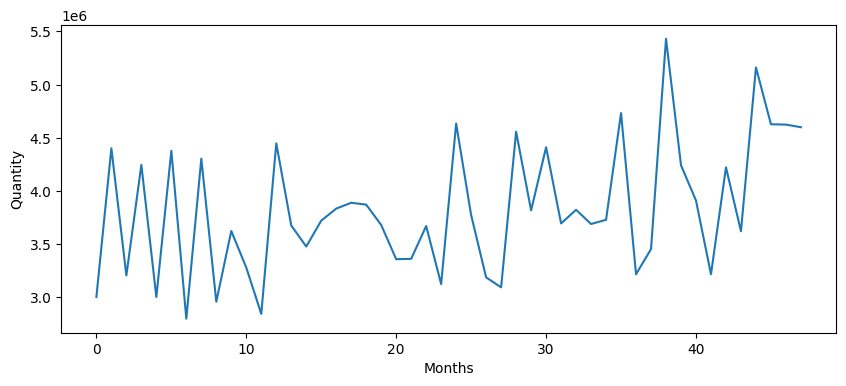

In [ ]:
 plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb_df['Sale Quantity'] );

In [ ]:
wsb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


In [ ]:
 wsb_df['mavg_12'] = wsb_df['Sale Quantity'].rolling( window = 12 ).mean().shift(1)

In [ ]:
 pd.set_option('display.float_format', lambda x: '%.2f' % x)
wsb_df[['Sale Quantity', 'mavg_12']][0:]

,Sale Quantity,mavg_12
0,3002666,NaN
1,4401553,NaN
2,3205279,NaN
3,4245349,NaN
4,3001940,NaN
5,4377766,NaN
6,2798343,NaN
7,4303668,NaN
8,2958185,NaN
9,3623386,NaN


from matplotlib import pyplot as plt
_df_70['Sale Quantity'].plot(kind='hist', bins=20, title='Sale Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_71['mavg_12'].plot(kind='hist', bins=20, title='mavg_12')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_72.plot(kind='scatter', x='Sale Quantity', y='mavg_12', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_73['Sale Quantity'].plot(kind='line', figsize=(8, 4), title='Sale Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_74['mavg_12'].plot(kind='line', figsize=(8, 4), title='mavg_12')
plt.gca().spines[['top', 'right']].set_visible(False)

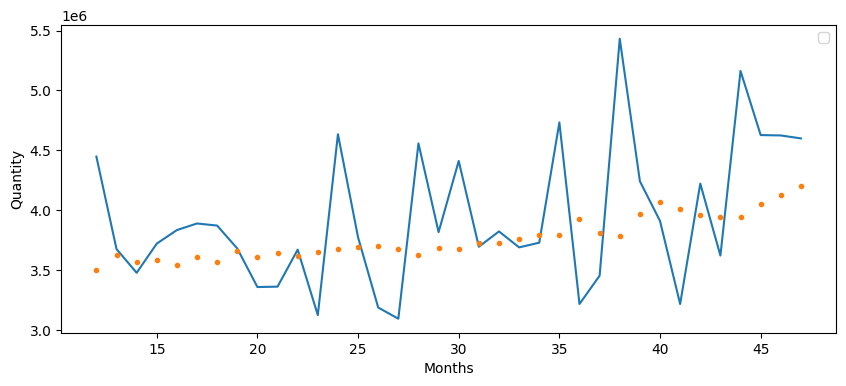

In [ ]:
plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb_df['Sale Quantity'][12:] );
plt.plot( wsb_df['mavg_12'][12:], '.' );
plt.legend();

In [ ]:
import numpy as np

In [ ]:
def get_mape(actual, predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round( np.mean(np.abs((actual - predicted) / actual)) * 100, 2 )

In [ ]:
get_mape( wsb_df['Sale Quantity'][36:].values,
          wsb_df['mavg_12'][36:].values)

np.float64(14.04)

In [ ]:
 from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error( wsb_df['Sale Quantity'][36:].values, wsb_df['mavg_12'][36:].values))

np.float64(734725.8359239782)

In [ ]:
 wsb_df['ewm'] = wsb_df['Sale Quantity'].ewm( alpha = 0.2 ).mean()

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
wsb_df[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg_12,ewm
36,37,3216483,121,1,3928410.33,3828234.64
37,38,3453239,128,0,3810280.00,3753219.93
38,39,5431651,170,0,3783643.33,4088961.93
39,40,4241851,160,0,3970688.42,4119543.81
40,41,3909887,151,1,4066369.08,4077607.99
41,42,3216438,120,1,4012412.75,3905359.34
42,43,4222005,152,0,3962369.58,3968692.78
43,44,3621034,125,0,3946629.42,3899157.24
44,45,5162201,170,0,3940489.50,4151776.99
45,46,4627177,160,0,4052117.17,4246860.31


from matplotlib import pyplot as plt
_df_47['Month'].plot(kind='hist', bins=20, title='Month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48['Sale Quantity'].plot(kind='hist', bins=20, title='Sale Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49['Promotion Expenses'].plot(kind='hist', bins=20, title='Promotion Expenses')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50['Competition Promotion'].plot(kind='hist', bins=20, title='Competition Promotion')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51.plot(kind='scatter', x='Month', y='Sale Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52.plot(kind='scatter', x='Sale Quantity', y='Promotion Expenses', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_53.plot(kind='scatter', x='Promotion Expenses', y='Competition Promotion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_54.plot(kind='scatter', x='Competition Promotion', y='mavg_12', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Month']
  ys = series['Sale Quantity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_55.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('Sale Quantity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Month']
  ys = series['Promotion Expenses']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_56.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('Promotion Expenses')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Month']
  ys = series['Competition Promotion']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_57.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('Competition Promotion')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Month']
  ys = series['mavg_12']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_58.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('mavg_12')

from matplotlib import pyplot as plt
_df_59['Month'].plot(kind='line', figsize=(8, 4), title='Month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_60['Sale Quantity'].plot(kind='line', figsize=(8, 4), title='Sale Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_61['Promotion Expenses'].plot(kind='line', figsize=(8, 4), title='Promotion Expenses')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_62['Competition Promotion'].plot(kind='line', figsize=(8, 4), title='Competition Promotion')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
get_mape( wsb_df[['Sale Quantity']][36:].values, wsb_df[['ewm']][36:].values)

np.float64(11.15)

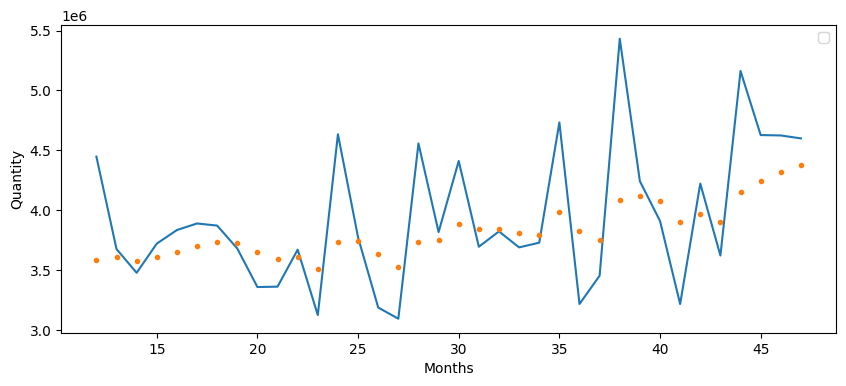

In [ ]:
 plt.figure( figsize=(10,4))
plt.xlabel( "Months" )
plt.ylabel( "Quantity" )
plt.plot( wsb_df['Sale Quantity'][12:] );
plt.plot( wsb_df['ewm'][12:], '.' );
plt.legend();

In [ ]:
 from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
ts_decompse = seasonal_decompose( np.array(wsb_df['Sale Quantity']), model='multiplicative', period = 12 )

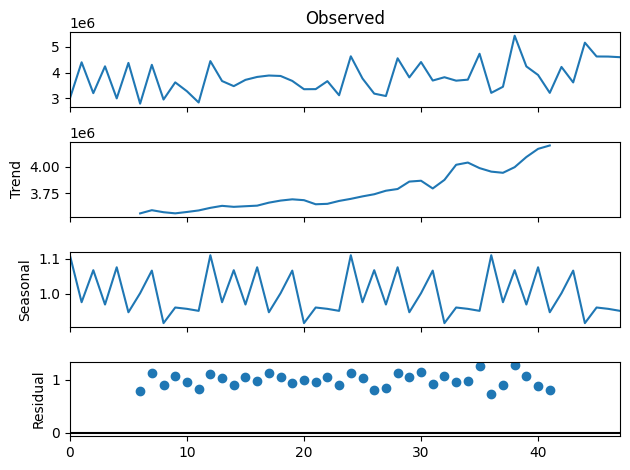

In [ ]:
## Plotting the deocompsed time series components
ts_plot = ts_decompse.plot()

In [ ]:
wsb_df['seasonal'] = ts_decompse.seasonal
wsb_df['trend'] = ts_decompse.trend

In [ ]:
 vimana_df = pd.read_csv('vimana.csv')
vimana_df.head(5)

,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403


from matplotlib import pyplot as plt
_df_63['Month'].plot(kind='hist', bins=20, title='Month')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_64['demand'].plot(kind='hist', bins=20, title='demand')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_65.plot(kind='scatter', x='Month', y='demand', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Month']
  ys = series['demand']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_66.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('demand')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Month']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Month'}, axis=1)
              .sort_values('Month', ascending=True))
  xs = counted['Month']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_67.sort_values('Month', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Month')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_68['Month'].plot(kind='line', figsize=(8, 4), title='Month')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_69['demand'].plot(kind='line', figsize=(8, 4), title='demand')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
 vimana_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   37 non-null     int64
 1   demand  37 non-null     int64
dtypes: int64(2)
memory usage: 724.0 bytes


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

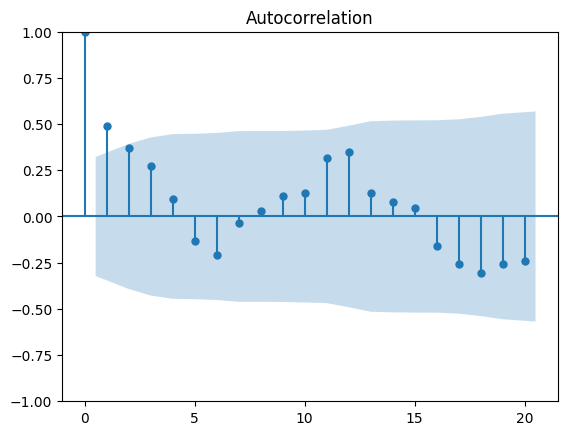

In [ ]:
# Show autocorrelation upto lag 10
acf_plot = plot_acf( vimana_df.demand, lags=20)

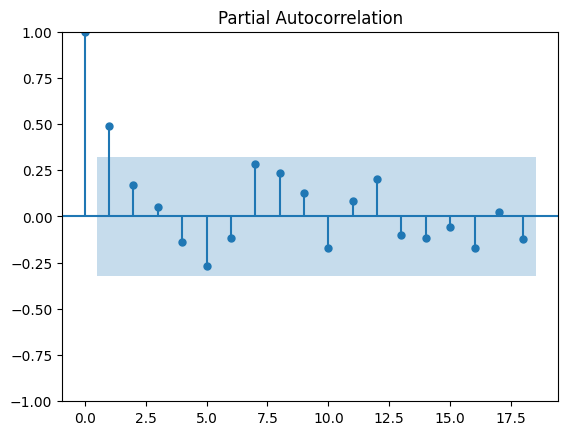

In [ ]:
pacf_plot = plot_pacf(vimana_df.demand, lags=18) # Reduced lags to 18, which is less than 50% of the sample size (37/2=18.5 rounded to 18)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA # Import ARIMA from the correct module

arima = ARIMA(vimana_df.demand[0:30].astype(np.float64).to_numpy(), order=(1, 0, 0))  # Now using the correct ARIMA class
ar_model = arima.fit()

In [ ]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   30
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -182.765
Date:                Mon, 07 Apr 2025   AIC                            371.530
Time:                        17:21:34   BIC                            375.734
Sample:                             0   HQIC                           372.875
                                 - 30                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        513.4426     43.815     11.718      0.000     427.567     599.318
ar.L1          0.4726      0.181      2.617      0.009       0.119       0.827
sigma2      1.136e+04   3299.003      3.444      0.001    4896.110    1.78e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.55   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.46   Prob(JB):                         0.42
Heteroskedasticity (H):               2.72   Skew:                             0.59
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast_31_37 = ar_model.predict(30, 36)

In [ ]:
forecast_31_37

array([480.1527, 497.7104, 506.0079, 509.9291, 511.7822, 512.658 , 513.0718])

In [ ]:
get_mape( vimana_df.demand[30:], forecast_31_37 )

np.float64(19.12)

In [ ]:
forecast_31_37 = ma_model.predict(30, 36)
get_mape( vimana_df.demand[30:],  forecast_31_37 )

np.float64(17.78)